In [6]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

# Create the 'data' directory in Google Drive if it doesn't exist
data_dir = '/content/drive/MyDrive/path/to/your/data'  # Change this path as needed
os.makedirs(data_dir, exist_ok=True)

# Define the base URL and parameters
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

# Initialize a list to store reviews
reviews = []

# Loop through pages to scrape reviews
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract reviews and append to the list
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

# Create a DataFrame from the reviews list
df = pd.DataFrame()
df["reviews"] = reviews

# Display the first few rows of the DataFrame
df.head()

df.to_csv(os.path.join(data_dir, "BA_reviews.csv"))
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified |", "")

# Display the cleaned DataFrame
df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


<ipython-input-6-e62580ea50ea>:51: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviews"] = df["reviews"].str.replace("✅ Trip Verified |", "")


,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"| 5 days before the flight, we were advised b..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,| Booked a flight from Bucharest to Mancheste...
4,| Booked online months ago and the only hitch...


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Downloading...
From: https://drive.google.com/uc?id=1-kpzjAXDgbVqrIYQfQ289r19suceW3DM
To: /content/drive/MyDrive/BA_reviews.csv
100%|██████████| 826k/826k [00:00<00:00, 30.9MB/s]


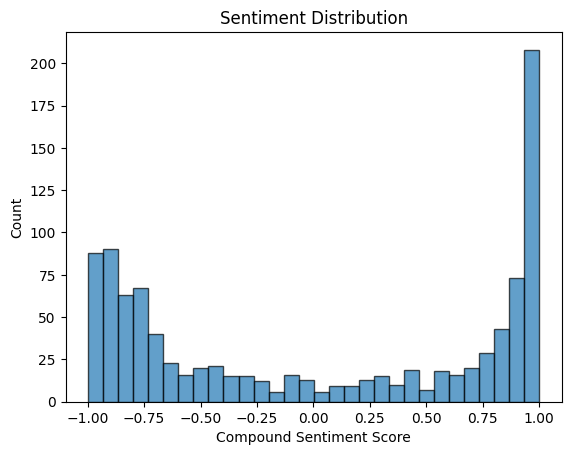

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1: 0.065*"." + 0.030*"the" + 0.027*"to" + 0.024*"and" + 0.024*"," + 0.018*"was" + 0.014*"a" + 0.012*"I" + 0.011*"in" + 0.010*"on"
Topic 2: 0.043*"." + 0.034*"the" + 0.030*"and" + 0.024*"," + 0.022*"to" + 0.019*"was" + 0.015*"a" + 0.014*"in" + 0.013*"I" + 0.012*"of"
Topic 3: 0.003*"wir" + 0.003*"und" + 0.002*"haben" + 0.002*"wieder" + 0.001*"reviews" + 0.001*"increase" + 0.001*"." + 0.001*"unseren" + 0.001*"sitzen" + 0.001*"Verspätung"
Topic 4: 0.044*"." + 0.041*"to" + 0.035*"the" + 0.028*"I" + 0.024*"," + 0.022*"and" + 0.017*"a" + 0.014*"was" + 0.012*"flight" + 0.011*"for"
Topic 5: 0.049*"." + 0.041*"the" + 0.028*"," + 0.028*"was" + 0.028*"and" + 0.023*"a" + 0.020*"to" + 0.016*"of" + 0.013*"The" + 0.012*"in"


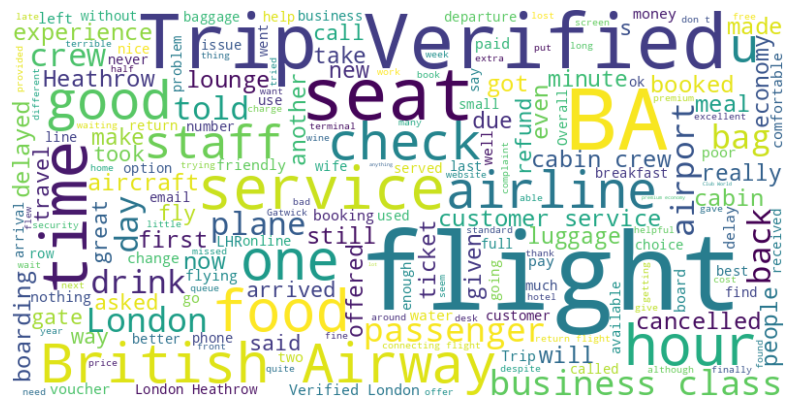

In [30]:
import gdown
import pandas as pd
import os
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download the vader_lexicon resource
import nltk
nltk.download('vader_lexicon')

# Set the working directory
os.chdir(r"/content/drive/My Drive")

# Google Drive link
file_url = 'https://drive.google.com/uc?id=1-kpzjAXDgbVqrIYQfQ289r19suceW3DM'

# Output file path
output_path = '/content/drive/MyDrive/BA_reviews.csv'

# Download the file
gdown.download(file_url, output_path, quiet=False)

# Read the CSV file
df = pd.read_csv(output_path)

# Display the first few rows of the DataFrame
df.head()

sia = SentimentIntensityAnalyzer()

# Add a new column 'compound' to the DataFrame with compound sentiment scores
df['compound'] = df['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plot a histogram of the compound sentiment scores
plt.hist(df['compound'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Count')
plt.show()


from gensim import corpora, models
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from nltk.tokenize import word_tokenize
import nltk

# Download the 'punkt' resource
nltk.download('punkt')
# Tokenize the reviews
tokenized_reviews = df['reviews'].apply(word_tokenize)

# Create a dictionary representation of the reviews
dictionary = corpora.Dictionary(tokenized_reviews)

# Convert the tokenized reviews into a bag-of-words representation
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for topic, words in lda_model.print_topics():
    print(f"Topic {topic + 1}: {words}")

#Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one text
all_reviews_text = ' '.join(df['reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_reviews_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


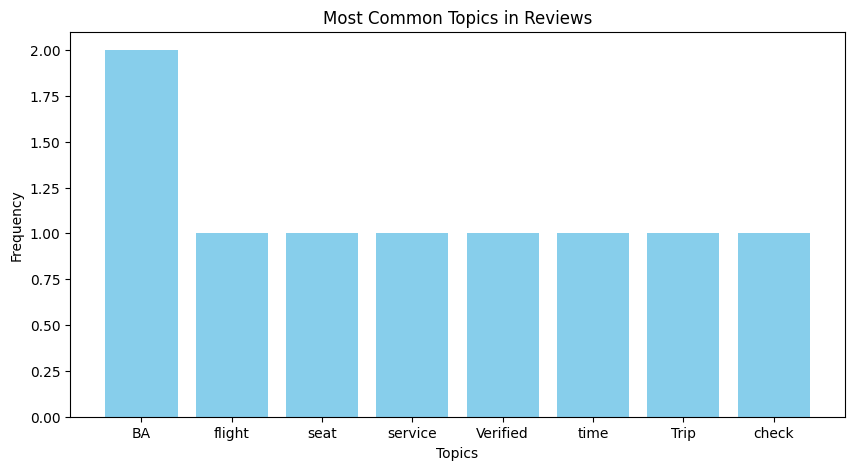

In [38]:
from collections import Counter
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = ["flight", "seat", "BA", "service", "Verified", "time", "Trip", "BA", "check"]

# Create a Counter object to count word frequencies
word_counts = Counter(data)

# Extract the top N words and their frequencies
top_words = word_counts.most_common()

# Separate words and frequencies for plotting
words, frequencies = zip(*top_words)

# Create a bar chart for frequency
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies, color='skyblue')
plt.title('Most Common Topics in Reviews')
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.show()
